In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import requests
from io import BytesIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle
import zipfile



# Define the path to the zip file in your Google Drive
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2019-04.csv.zip'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

# Read the CSV file
csv_file_path = '/content/yellow_tripdata_2019-04.csv'
df = pd.read_csv(csv_file_path)

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-04-01 00:04:09,2019-04-01 00:06:35,1,0.5,1,N,239,239,1,4.0,3.0,0.5,1.00,0.0,0.3,8.80,2.5
1,1,2019-04-01 00:22:45,2019-04-01 00:25:43,1,0.7,1,N,230,100,2,4.5,3.0,0.5,0.00,0.0,0.3,8.30,2.5
2,1,2019-04-01 00:39:48,2019-04-01 01:19:39,1,10.9,1,N,68,127,1,36.0,3.0,0.5,7.95,0.0,0.3,47.75,2.5
3,1,2019-04-01 00:35:32,2019-04-01 00:37:11,1,0.2,1,N,68,68,2,3.5,3.0,0.5,0.00,0.0,0.3,7.30,2.5
4,1,2019-04-01 00:44:05,2019-04-01 00:57:58,1,4.8,1,N,50,42,1,15.5,3.0,0.5,3.85,0.0,0.3,23.15,2.5


In [ ]:
# Calculate percentiles for Question A
def calculate_percentiles(df, value, group, percent):
    percent_df = df.groupby(group)[value].quantile(percentiles).unstack().reset_index()
    percent_df.columns = [f'{value}_p_{int(p*100)}' if isinstance(p, float) else p for p in percent_df.columns]
    return percent_df

# Percentiles to calculate
percentiles = [0.05, 0.50, 0.95]

# Calculate the required percentiles
fare_amount = calculate_percentiles(df, 'fare_amount', ['VendorID', 'passenger_count', 'payment_type'], percentiles)
tip_amount = calculate_percentiles(df, 'tip_amount', ['VendorID', 'passenger_count', 'payment_type'], percentiles)
total_amount = calculate_percentiles(df, 'total_amount', ['VendorID', 'passenger_count', 'payment_type'], percentiles)

# Combine the results into a single DataFrame
result = fare_amount.merge(tip_amount, on=['VendorID', 'passenger_count', 'payment_type'])
result = result.merge(total_amount, on=['VendorID', 'passenger_count', 'payment_type'])

# Save the result to a CSV file
result.to_csv('/content/report.csv', index=False)

# Model Training for Question B
features = ['VendorID', 'passenger_count', 'payment_type', 'trip_distance']
target = 'total_amount'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# Save the model
with open('/content/ml_model.pkl', 'wb') as file:
    pickle.dump(model, file)


RMSE: 324.6983293625262


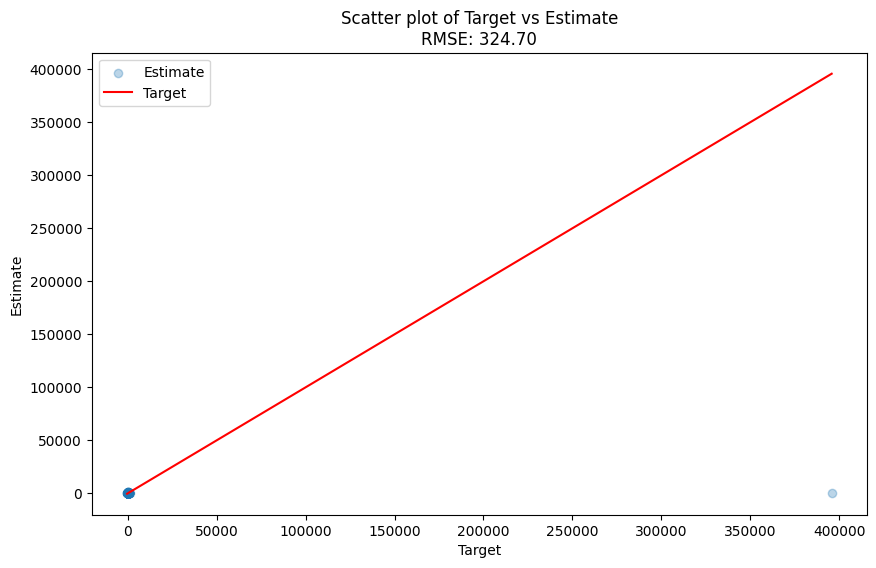

In [ ]:

import matplotlib.pyplot as plt

# Create a scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, label='Estimate')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Target')
plt.xlabel('Target')
plt.ylabel('Estimate')
plt.title(f'Scatter plot of Target vs Estimate\nRMSE: {rmse:.2f}')
plt.legend()
plt.savefig('/content/scatter_plot.png')
plt.show()

In [ ]:
# Save the code and results to a zip file
with open('/content/code.txt', 'w') as f:
    f.write("""
import pandas as pd
import numpy as np
from zipfile import ZipFile
import requests
from io import BytesIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle
import zipfile



# Define the path to the zip file in your Google Drive
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2019-04.csv.zip'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

# Read the CSV file
csv_file_path = '/content/yellow_tripdata_2019-04.csv'
df = pd.read_csv(csv_file_path)

df.head()

# Calculate percentiles for Question A
def calculate_percentiles(df, value, group, percent):
    percent_df = df.groupby(group)[value].quantile(percentiles).unstack().reset_index()
    percent_df.columns = [f'{value}_p_{int(p*100)}' if isinstance(p, float) else p for p in percent_df.columns]
    return percent_df

# Percentiles to calculate
percentiles = [0.05, 0.50, 0.95]

# Calculate the required percentiles
fare_amount = calculate_percentiles(df, 'fare_amount', ['VendorID', 'passenger_count', 'payment_type'], percentiles)
tip_amount = calculate_percentiles(df, 'tip_amount', ['VendorID', 'passenger_count', 'payment_type'], percentiles)
total_amount = calculate_percentiles(df, 'total_amount', ['VendorID', 'passenger_count', 'payment_type'], percentiles)

# Combine the results into a single DataFrame
result = fare_amount.merge(tip_amount, on=['VendorID', 'passenger_count', 'payment_type'])
result = result.merge(total_amount, on=['VendorID', 'passenger_count', 'payment_type'])

# Save the result to a CSV file
result.to_csv('/content/report.csv', index=False)

# Model Training for Question B
features = ['VendorID', 'passenger_count', 'payment_type', 'trip_distance']
target = 'total_amount'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# Save the model
with open('/content/ml_model.pkl', 'wb') as file:
    pickle.dump(model, file)

import matplotlib.pyplot as plt

# Create a scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, label='Estimate')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Target')
plt.xlabel('Target')
plt.ylabel('Estimate')
plt.title(f'Scatter plot of Target vs Estimate\nRMSE: {rmse:.2f}')
plt.legend()
plt.savefig('/content/scatter_plot.png')
plt.show()

""")

In [ ]:
with zipfile.ZipFile('/content/Karim_Osman.zip', 'w') as zipf:
    zipf.write('/content/code.txt')
    zipf.write('/content/report.csv')
    zipf.write('/content/ml_model.pkl')
    zipf.write('/content/scatter_plot.png')